# Publication-ready figures

In [1]:
from astropy.io import fits
from matplotlib import cm
from astropy.visualization import (MinMaxInterval, ZScaleInterval, SqrtStretch, ImageNormalize)
import matplotlib.pyplot as plt
import numpy as np
import platform
import glob
import os
from astropy.wcs import WCS
import aplpy
from astropy import units as u
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
print(f"Node Name: {platform.uname().node}")

if platform.uname().node == 'artemis':
    int_raw_data_path = '/media/vdomcek/Storage/work/2019_INT_La_Palma/'
    int_dropbox_path = '/home/vdomcek/Dropbox/academia/projects/2019_INT_La_Palma/'
    print(f'Path:', int_raw_data_path)
if platform.uname().node == 'prometheus':
    print('You are on a wrong computer')

Node Name: artemis
Path: /media/vdomcek/Storage/work/2019_INT_La_Palma/


## Fig.1

In [3]:
from matplotlib import colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = cm.get_cmap('Oranges')
cmap_radio = truncate_colormap(cmap, 0.5, 0.7)
cmap = cm.get_cmap('viridis')
cmap_xray = truncate_colormap(cmap, 0.4, 0.6)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 58720.902306 from DATE-END'. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -5.000e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.606e+01 [aplpy.core]


/home/vdomcek/anaconda3/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/home/vdomcek/anaconda3/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
/home/vdomcek/anaconda3/lib/python3.7/site-packages/aplpy/colorbar.py:102: UserWarning: Bottom colorbar not fully implemented
  warnings.warn("Bottom colorbar not fully implemented")
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 58720.902306 from DATE-END'. [astropy.wcs.wcs]


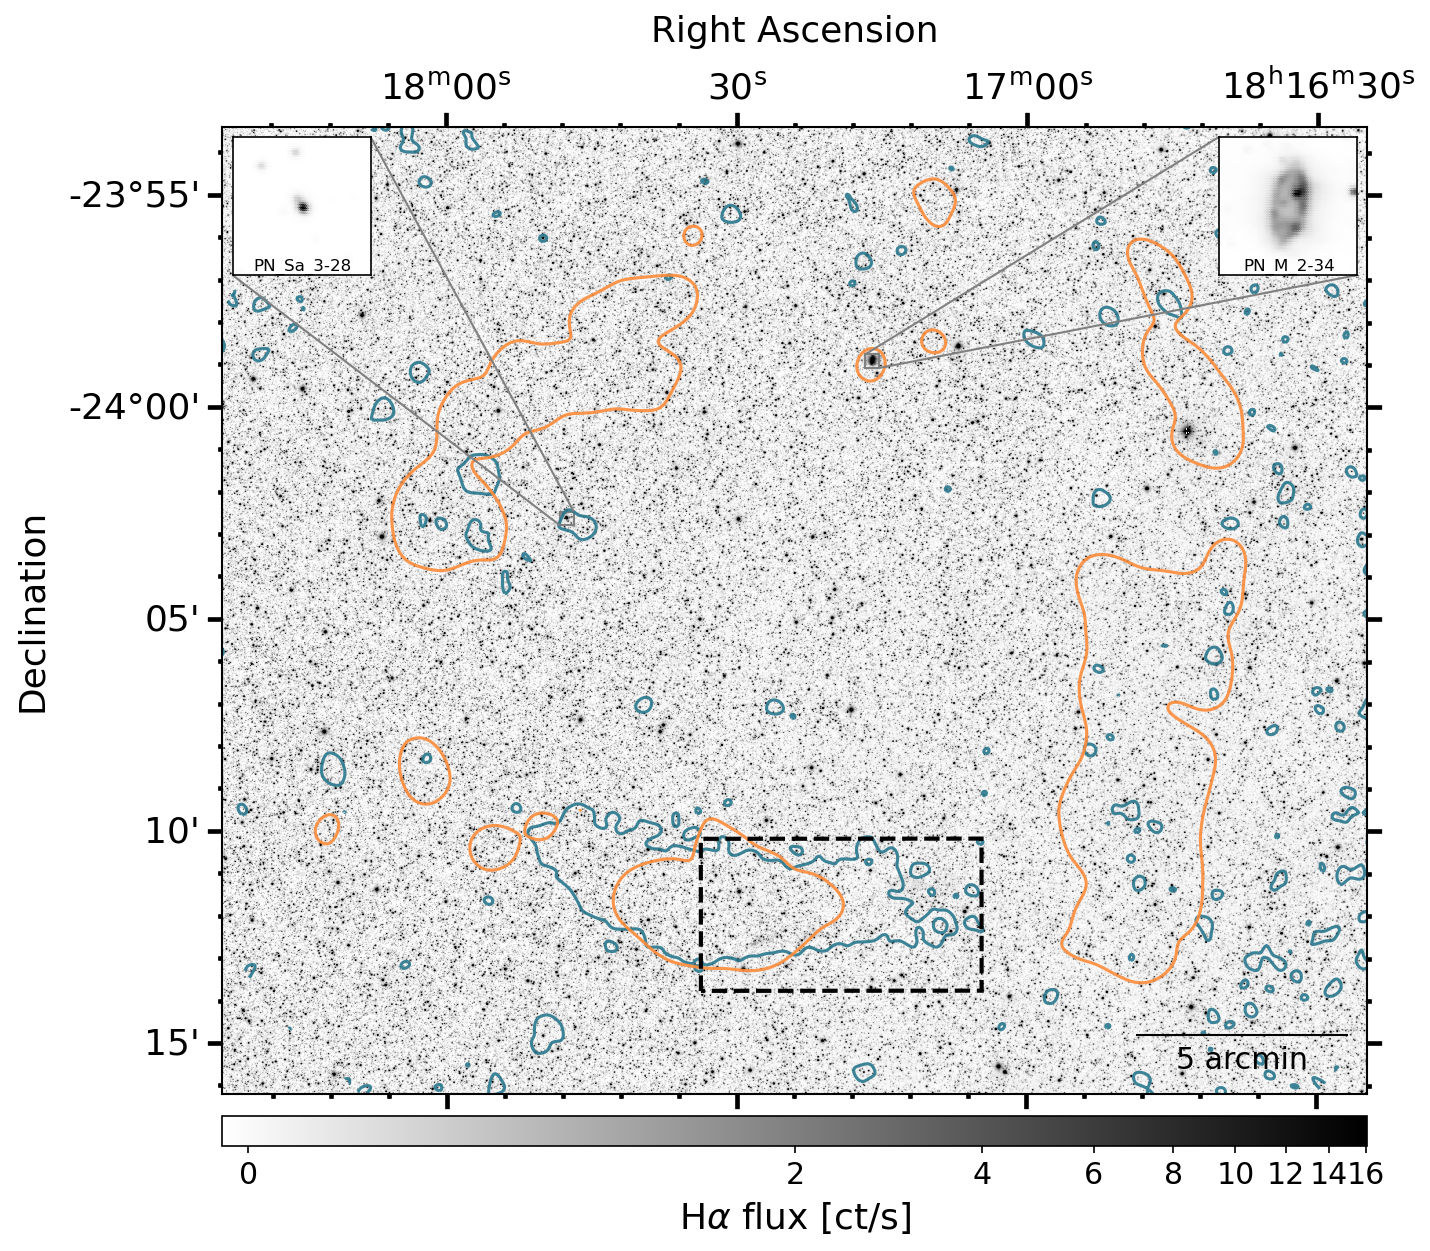

In [4]:
# figure = plt.figure(figsize=(15, 7))

fig = aplpy.FITSFigure(int_dropbox_path+'/g7/analysis/fm/ha_90m_fm_sysbkgcor.fits',dpi=150)
ax = plt.gca()
# fig.set_system_latex(True)
# fig.recenter(274.31, -24, width=0.6, height=0.6)
fig.recenter(274.35, -24.08, width=0.45, height=0.38)
fig.add_scalebar(5 * u.arcmin)
fig.scalebar.set_label(r'5 arcmin')
fig.scalebar.set_font(size='x-large', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')

# fig.scalebar.set_corner('top right')
fig.show_colorscale(cmap='Greys', stretch='arcsinh')
fig.add_colorbar()
fig.colorbar.set_location('bottom')
fig.colorbar.set_font(size='x-large', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
fig.colorbar.set_pad(0.15)

fig.colorbar.set_axis_label_text(r'H$\alpha$ flux [ct/s]')
# fig.colorbar.set_axis_label_pad(10)
# fig.colorbar.set_axis_label_rotation(90)
fig.colorbar.set_axis_label_font(size='xx-large', weight='medium')

fig.tick_labels.set_font(size='xx-large')
fig.tick_labels.set_xposition('top')
fig.ticks.set_length(6) 
fig.ticks.set_linewidth(2) 
fig.set_nan_color('white')

fig.frame.set_linewidth(2)
fig.axis_labels.set_xtext('Right Ascension')
fig.axis_labels.set_ytext('Declination')
fig.axis_labels.set_xposition('top')
fig.axis_labels.set_font(size='xx-large', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')

# fig.show_contour('/home/vdomcek/Dropbox/work/2019_INT_La_Palma/g7/xrays/G7_pmm_500_5000ima_0_subdiv_smooth.fits',levels=[0.00007,0.00017], cmap=cmap_xray, smooth=3, kernel='gauss')
# fig.show_contour('/home/vdomcek/Dropbox/work/2019_INT_La_Palma/g7/radio/g007.7-03.7_1.42E09_NVSS.fits',levels=[0.003,0.02], cmap=cmap_radio, smooth=3, kernel='gauss', layer='radio',alpha=0.8)
fig.show_contour(int_dropbox_path+'/g7/xrays/G7_pmm_500_5000ima_0_subdiv_smooth.fits',levels=[0.00005], cmap=cmap_xray, smooth=3, kernel='gauss', layer='X-ray',alpha=0.9)
fig.show_contour(int_dropbox_path+'/g7/radio/g007.7-03.7_1.42E09_NVSS.fits',levels=[0.003], cmap=cmap_radio, smooth=3, kernel='gauss', layer='Radio',alpha=0.9)
fig.show_regions(int_dropbox_path+'/g7/cutout_region.reg')
# fig.show_regions('/home/vdomcek/Dropbox/work/2019_INT_La_Palma/g7/PN_M_2-34.reg')
# fig.show_regions('/home/vdomcek/Dropbox/work/2019_INT_La_Palma/g7/PN_Sa_3-28.reg')

fig.set_theme('publication')

x1, y1 = 3226, 3448
delta = 30
ax2 = zoomed_inset_axes(ax, 10, loc=1)
img1 = ax2.pcolormesh(range(x1-delta,x1+delta),range(y1-delta,y1+delta),fig.image._A[y1-delta:y1+delta,x1-delta:x1+delta], cmap='Greys')
img1.set_edgecolor("face")
# Z2 = np.zeros([len(fig.image._A), len(fig.image._A[0])], dtype="d")
# Z2[y1-delta:y1+delta,x1-delta:x1+delta] = fig.image._A
# # ax2.imshow(fig.image._A[y1-delta:y1+delta,x1-delta:x1+delta], cmap='Greys')
# ax2.imshow(Z2, cmap='Greys')

mark_inset(ax, ax2, loc1=2, loc2=4, fc="none", ec="0.5")
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.text(x1,y1-delta,'PN_M_2-34',size=8,ha='center',va='bottom')

x2, y2 = 1920, 2775
ax3 = zoomed_inset_axes(ax, 10, loc=2)
img3 = ax3.pcolormesh(range(x2-delta,x2+delta),range(y2-delta,y2+delta),fig.image._A[y2-delta:y2+delta,x2-delta:x2+delta], cmap='Greys')
mark_inset(ax, ax3, loc1=1, loc2=3, fc="none", ec="0.5")
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
ax3.text(x2,y2-delta,'PN_Sa_3-28',size=8,ha='center',va='bottom')
img3.set_edgecolor("face")


plt.show()
# fig.save('/home/vdomcek/Dropbox/work/2019_INT_La_Palma/g7/analysis/figures/fig_g7_full_ha.pdf',dpi=300)

# Fig.2

In [5]:
work_dir = 'g7/analysis/fm/'

In [6]:
diff_ha = fits.open(int_dropbox_path + 'g7/analysis/fluxed/diff_ha_fluxed.fits')[0]
diff_o3 = fits.open(int_dropbox_path + 'g7/analysis/fluxed/diff_o3_fluxed.fits')[0]
diff_s2 = fits.open(int_dropbox_path + 'g7/analysis/fluxed/diff_s2_fluxed.fits')[0]
diff_hb = fits.open(int_dropbox_path + 'g7/analysis/fluxed/diff_hb_fluxed.fits')[0]
xrays = fits.open(int_dropbox_path + 'g7/xrays/G7_pmm_500_5000_nosmothima_0_subdiv_smooth.fits')[0].data

In [7]:
from astropy.coordinates import SkyCoord
import pandas as pd

load_contours = np.genfromtxt(int_dropbox_path + 'g7/xrays/main_xray_contour.ctr',skip_header=6, skip_footer=1)
w = WCS(diff_ha.header)

x = []
y = []
for line in load_contours:
    x_val, y_val = w.world_to_pixel(SkyCoord(line[0],line[1], frame='icrs', unit='deg'))
    x.append(float(x_val)), y.append(float(y_val))


In [8]:
load_contours1 = np.genfromtxt(int_dropbox_path + 'g7/xrays/side_contour1.crt')
w = WCS(diff_ha.header)

x1 = []
y1 = []
for line in load_contours1:
    x_val, y_val = w.world_to_pixel(SkyCoord(line[0],line[1], frame='icrs', unit='deg'))
    x1.append(float(x_val)), y1.append(float(y_val))


<Figure size 432x288 with 0 Axes>

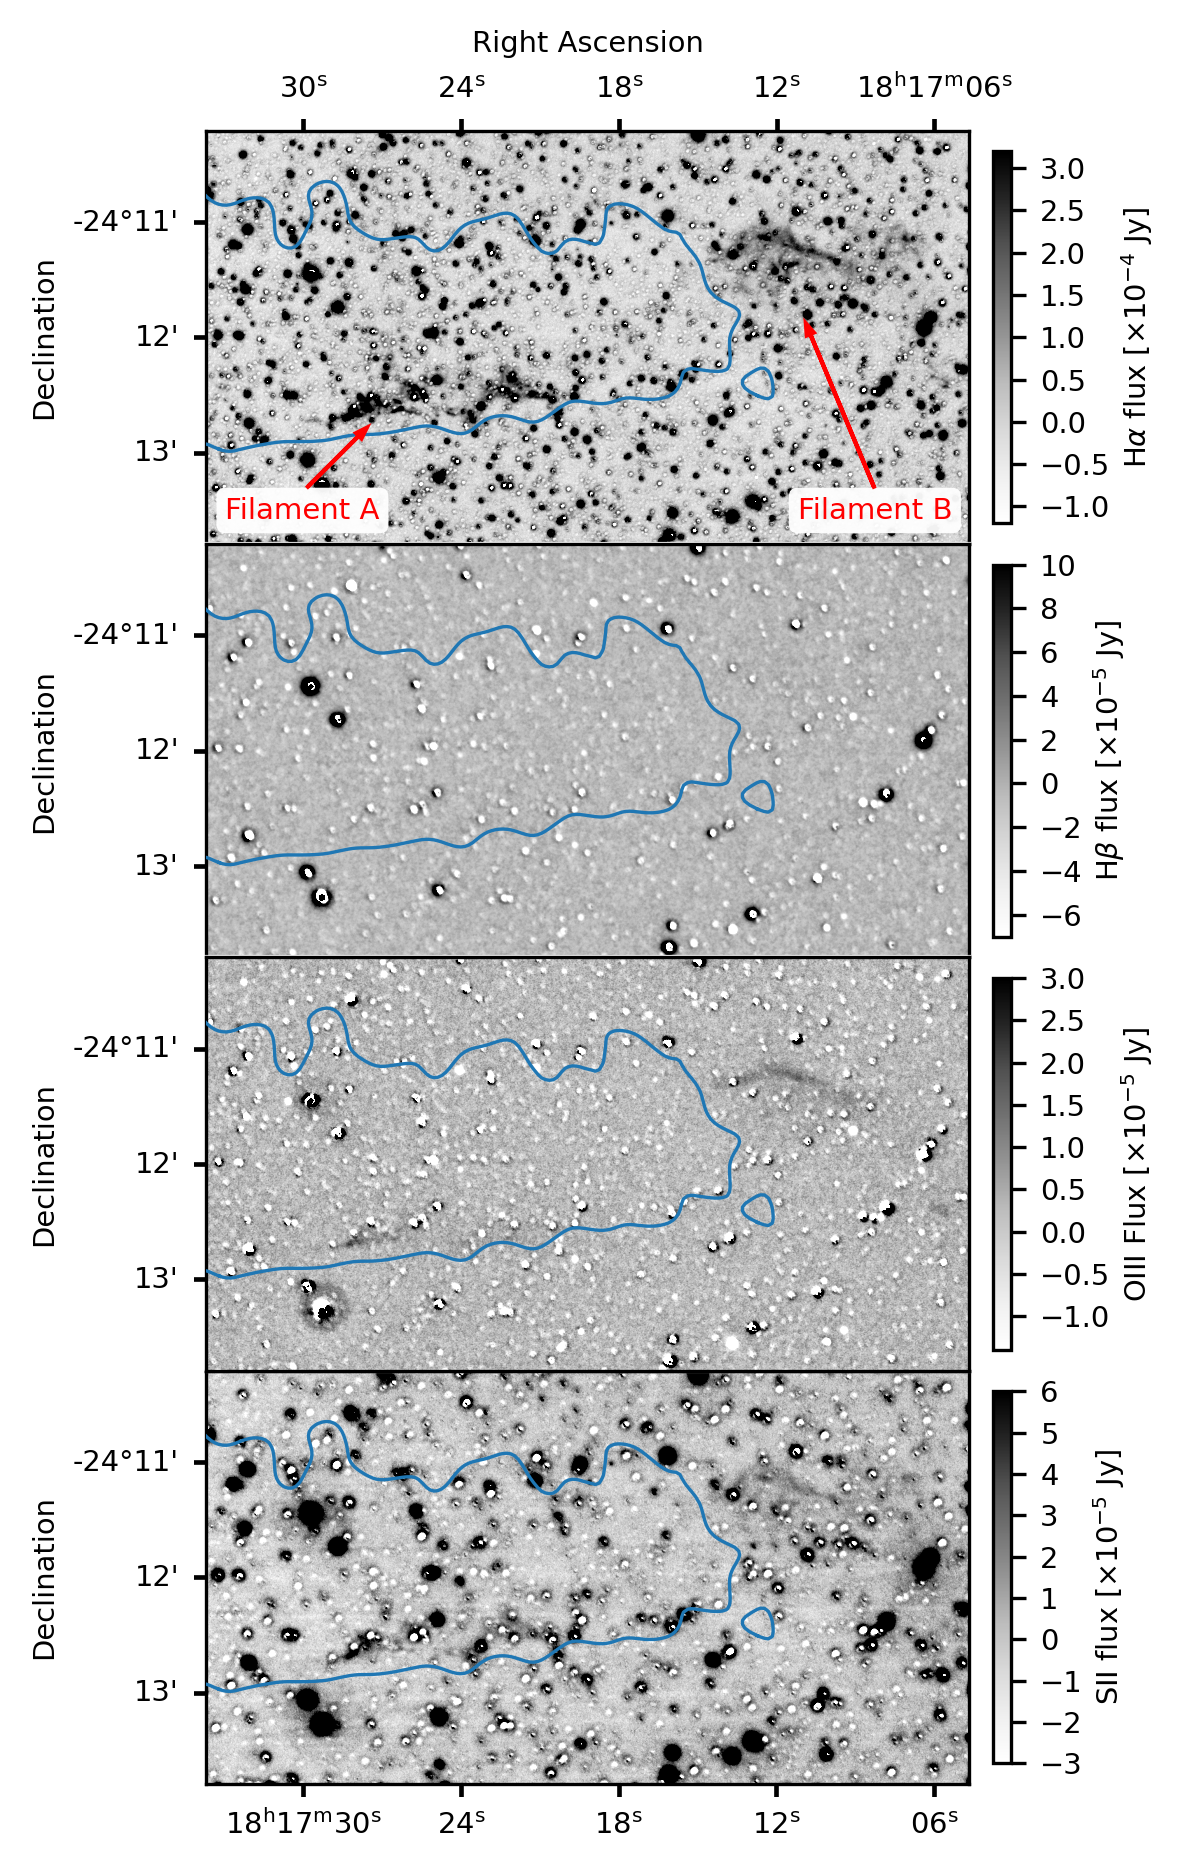

In [9]:
xlim = (0,1200)
ylim = (0,650)

plt.clf()
params = {'legend.fontsize': 'x-small',
          'axes.labelsize': 'x-small',
          'axes.titlesize': 'x-small',
          'xtick.labelsize': 'x-small',
          'ytick.labelsize': 'x-small',
         }
fig = plt.figure(figsize=(10, 7.3), dpi=300)
plt.subplots_adjust(wspace=0.)
plt.rcParams.update(params)

ax1 = plt.subplot((411), projection=WCS(diff_ha.header)) 
ax1.tick_params(axis='x', which='major', width=1.00, length=3, top=True,
               bottom=False, direction='out')
ax1.tick_params(axis='y', which='major', width=1.00, length=3, right=False,
               left=True, direction='out')
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['ra'].set_axislabel_position('top')
ax1.coords['ra'].set_ticklabel_position('top')
ax1.coords['dec'].set_axislabel('Declination')
# ax1.scatter(x,y,lw=0.1)
ax1.plot(x,y,lw=0.8,c='C0')
ax1.plot(x1,y1,lw=0.8,c='C0')
ax1.plot(x2,y2,lw=0.8,c='C0')
props = dict(boxstyle='round', facecolor='white', alpha=0.95, linewidth=0)
ax1.text(30,40,'Filament A', color='Red',fontsize=7, bbox=props)
ax1.arrow(160,90,80,80, color='red', head_width=12,zorder=100)
ax1.text(930,40,'Filament B', color='Red',fontsize=7, bbox=props)
ax1.arrow(1050,90,-100,240, color='red', head_width=12,zorder=100)


im = ax1.imshow(diff_ha.data*1e4, origin='lower',cmap='Greys', norm=ImageNormalize(diff_ha.data*1e4, ZScaleInterval()),vmin=-1.2, vmax =3.2)
# ax1.contour(xrays, levels=0.00007)

cbar = fig.colorbar(im, ax=ax1, fraction=0.008, pad=0.01, orientation="vertical")
cbar.set_label(r'H$\alpha$ flux [$\times10^{-4}$ Jy]', rotation=90, labelpad=2)
cbar.ax.tick_params(labelsize='x-small')
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

plt.subplots_adjust(hspace=0.)


ax2 = plt.subplot((412), projection=WCS(diff_ha.header)) 
ax2.tick_params(axis='x', which='major', width=1.00, length=3, top=False,
               bottom=False, direction='out')
ax2.tick_params(axis='y', which='major', width=1.00, length=3, right=False,
               left=True, direction='out')
# ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['ra'].set_axislabel_position('None')
ax2.coords['ra'].set_ticklabel_position('None')
ax2.coords['dec'].set_axislabel('Declination')
ax2.plot(x,y,lw=0.8,c='C0')
ax2.plot(x1,y1,lw=0.8,c='C0')
ax2.plot(x2,y2,lw=0.8,c='C0')

im = ax2.imshow(diff_hb.data*1e5, origin='lower',cmap='Greys', norm=ImageNormalize(diff_hb.data*1e5, ZScaleInterval()) ,vmin=-7, vmax =10)

cbar = fig.colorbar(im, ax=ax2, fraction=0.008, pad=0.01, orientation="vertical")
cbar.set_label(r'H$\beta$ flux [$\times10^{-5}$ Jy]', rotation=90, labelpad=2)
cbar.ax.tick_params(labelsize='x-small')
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)



plt.subplots_adjust(hspace=0.)


ax4 = plt.subplot((414), projection=WCS(diff_ha.header)) 
ax4.tick_params(axis='x', which='major', width=1.00, length=3, top=False,
               bottom=True, direction='out')
ax4.tick_params(axis='y', which='major', width=1.00, length=3, right=False,
               left=True, direction='out')
# ax4.coords['ra'].set_axislabel('Right Ascension')
# ax4.coords['ra'].set_axislabel_position('bottom')
# ax4.coords['ra'].set_ticklabel_position('bottom')
ax4.coords['dec'].set_axislabel('Declination')
ax4.plot(x,y,lw=0.8,c='C0')
ax4.plot(x1,y1,lw=0.8,c='C0')
ax4.plot(x2,y2,lw=0.8,c='C0')

im = ax4.imshow(diff_s2.data*1e5, origin='lower',cmap='Greys', vmin=-3, vmax=6, norm=ImageNormalize(diff_s2.data*1e5, ZScaleInterval()) )

cbar = fig.colorbar(im, ax=ax4, fraction=0.008, pad=0.01, orientation="vertical")
cbar.set_label(r'SII flux [$\times10^{-5}$ Jy]', rotation=90, labelpad=2)
cbar.ax.tick_params(labelsize='x-small')
ax4.set_xlim(xlim)
ax4.set_ylim(ylim)

plt.subplots_adjust(hspace=0.)


ax3 = plt.subplot((413), projection=WCS(diff_ha.header)) 
ax3.tick_params(axis='x', which='major', width=1.00, length=3, top=False,
               bottom=False, direction='out')
ax3.tick_params(axis='y', which='major', width=1.00, length=3, right=False,
               left=True, direction='out')
ax3.coords['ra'].set_axislabel('Right Ascension')
ax3.coords['ra'].set_axislabel_position('None')
ax3.coords['ra'].set_ticklabel_position('None')
ax3.coords['dec'].set_axislabel('Declination')
ax3.plot(x,y,lw=0.8,c='C0')
ax3.plot(x1,y1,lw=0.8,c='C0')
ax3.plot(x2,y2,lw=0.8,c='C0')

im = ax3.imshow(diff_o3.data*1e5, origin='lower',cmap='Greys' ,vmin=-1.4, vmax =3., norm=ImageNormalize(diff_o3.data*1e5, ZScaleInterval()))

cbar = fig.colorbar(im, ax=ax3, fraction=0.008, pad=0.01, orientation="vertical")
cbar.set_label(r'OIII Flux [$\times10^{-5}$ Jy]', rotation=90, labelpad=2)
cbar.ax.tick_params(labelsize='x-small')
ax3.set_xlim(xlim)
ax3.set_ylim(ylim)

# plt.savefig(int_dropbox_path + 'g7/analysis/figures/fig_g7_diff_all_flux.pdf', bbox_inches='tight')
plt.show()
plt.close()


